In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/gjawa/Documents/TechnoGeeks/Mall_Customers.csv")

In [7]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
df = df.iloc[:, 3:]

C:\Users\gjawa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


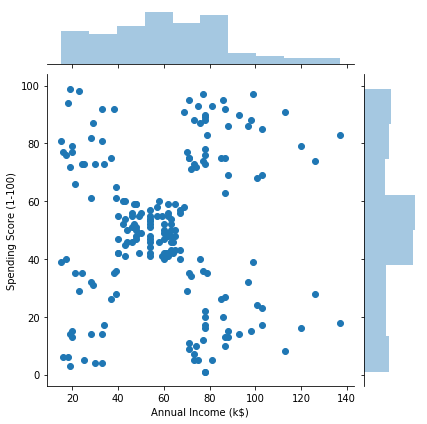

In [16]:
sns.jointplot(df["Annual Income (k$)"],df["Spending Score (1-100)"],data=df)

In [18]:
from sklearn.cluster import KMeans

In [50]:
wcss = []

In [51]:
for i in range(1,21):
    kmean = KMeans(n_clusters=i, init='k-means++')
    kmean.fit(df)
    wcss.append(kmean.inertia_)

In [52]:
print(wcss)

[270395.10000000003, 182057.775110044, 106648.0707514565, 73923.27575976221, 44448.45544793371, 37280.6362365895, 31305.521492999753, 25064.78310178194, 21896.527837018053, 19686.145511010727, 17591.72111381827, 16366.803532578531, 14294.078928278928, 13134.068923683843, 12356.064282491701, 11155.108869915692, 10338.835585982644, 9427.4855991231, 8594.653318250377, 8113.081163281163]


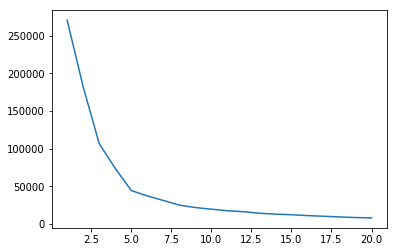

In [53]:
plt.plot(range(1,21), wcss)

In [54]:
kmeans = KMeans(n_clusters=5, init="k-means++")

In [55]:
y_kmeans = kmeans.fit_predict(df)

In [56]:
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [57]:
df["cluster"] = y_kmeans

In [58]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [70]:
x = df.values

In [72]:
x[y_kmeans==0 , 0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

In [73]:
x[y_kmeans == 0, 1]

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)

In [74]:
kmeans.cluster_centers_

array([[ 2.57272727e+01,  7.93636364e+01, -8.88178420e-16],
       [ 5.52962963e+01,  4.95185185e+01,  4.00000000e+00],
       [ 8.65384615e+01,  8.21282051e+01,  2.00000000e+00],
       [ 8.82000000e+01,  1.71142857e+01,  1.00000000e+00],
       [ 2.63043478e+01,  2.09130435e+01,  3.00000000e+00]])

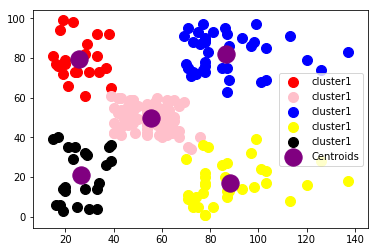

In [78]:
plt.scatter(x[y_kmeans==0 , 0],x[y_kmeans==0 , 1], s=100, c='red', label='cluster1')
plt.scatter(x[y_kmeans==1 , 0],x[y_kmeans==1 , 1], s=100, c='pink', label='cluster1')
plt.scatter(x[y_kmeans==2 , 0],x[y_kmeans==2 , 1], s=100, c='blue', label='cluster1')
plt.scatter(x[y_kmeans==3 , 0],x[y_kmeans==3 , 1], s=100, c='yellow', label='cluster1')
plt.scatter(x[y_kmeans==4 , 0],x[y_kmeans==4 , 1], s=100, c='black', label='cluster1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="purple", label="Centroids")
plt.legend()

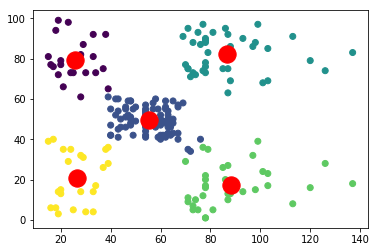

In [69]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], data=df, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="red")